In [75]:
import networkx as nx
import matplotlib.pyplot as plt

#### Construct a connected random graph

In [76]:
from Evaluation import GraphConstructionAlgorithms as gca

gg = gca.GraphGenerator()
G = gg.construct_connected_er(8, 0.5)

#### Construct a triangulation using the elimination game algorithm:

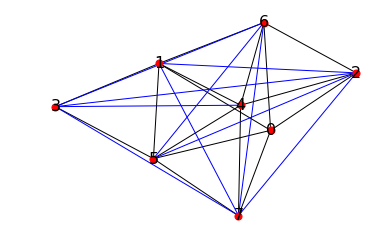

Size of this triangulation: 10


In [77]:
from TriangulationAlgorithms import EG
aeg = EG.Algorithm_EliminationGame(G.copy())
aeg.run()
# draw the triangulated graph. The original edges are black, new edges are blue.
aeg.draw_triangulation()
print ("Size of this triangulation: "+str(len(aeg.edges_of_triangulation)))

#### Construct a triangulation using a randomized elimination game algorithm:

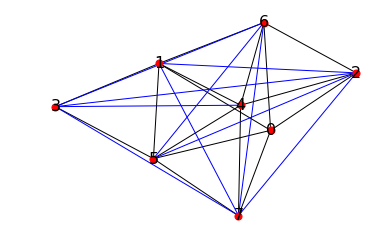

Size of this triangulation: 10


In [78]:
aeg = EG.Algorithm_EliminationGame(G.copy())
aeg.run_randomized()
# draw the triangulated graph. The original edges are black, new edges are blue.
aeg.draw_triangulation()
print ("Size of this triangulation: "+str(len(aeg.edges_of_triangulation)))

#### Construct a minimal triangulation using the saturate minimal separators algorithm:

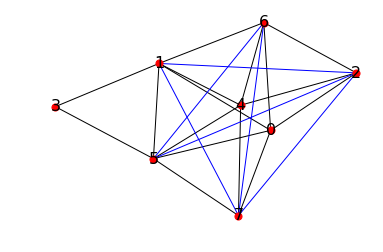

Size of this triangulation: 6


In [79]:
from TriangulationAlgorithms import SMS
sms = SMS.Algorithm_SMS(G.copy())
sms.run()
# draw the triangulated graph. The original edges are black, new edges are blue.
sms.draw_triangulation()
print ("Size of this triangulation: "+str(len(sms.edges_of_triangulation)))

#### Construct a minimal triangulation using a randomized saturate minimal separators algorithm:

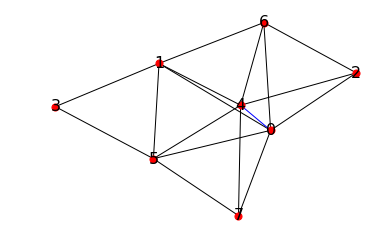

Size of this triangulation: 1


In [80]:
sms = SMS.Algorithm_SMS(G.copy())
sms.run_randomized()
# draw the triangulated graph. The original edges are black, new edges are blue.
sms.draw_triangulation()
print ("Size of this triangulation: "+str(len(sms.edges_of_triangulation)))

#### Construct a minimal triangulation using the Clique Minimal Triangulation Algorithm

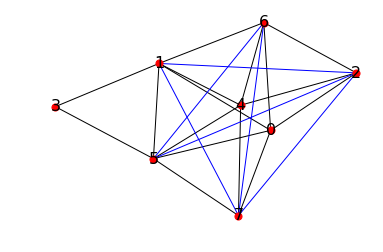

Size of this triangulation: 6


In [81]:
from TriangulationAlgorithms import CMT
cmt = CMT.Algorithm_CMT(G.copy())
cmt.run()
# draw the triangulated graph. The original edges are black, new edges are blue.
cmt.draw_triangulation()
print ("Size of this triangulation: "+str(len(cmt.edges_of_triangulation)))


#### Construct a  minimal triangulation using a randomized Clique Minimal Triangulation algorithm:

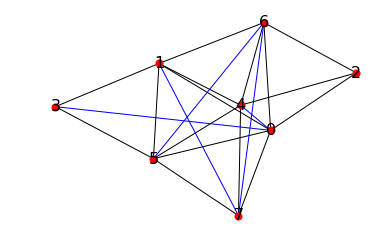

Size of this triangulation: 5


In [82]:
cmt = CMT.Algorithm_CMT(G.copy())
cmt.run_randomized()
# draw the triangulated graph. The original edges are black, new edges are blue.
cmt.draw_triangulation()
print ("Size of this triangulation: "+str(len(cmt.edges_of_triangulation)))

#### Construct a minimal triangulation using the Clique Minimal Triangulation Algorithm to minimize a triangulation constructed by elimination game

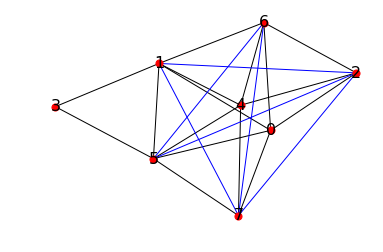

Size of this triangulation: 6


In [84]:
from TriangulationAlgorithms import EG
aeg = EG.Algorithm_EliminationGame(G.copy())
aeg.run()
#aeg.draw_triangulation()

cmt = CMT.Algorithm_CMT(G.copy())
F = aeg.get_triangulation_edges()
H = G.copy()
H.add_edges_from(F)
T = {}
for e in F:
	Te = []
	common_neighborhood = [n for n in H.nodes if (n,e[0]) in H.edges() and (n,e[1]) in H.edges()]
	for i in range(len(common_neighborhood)):
		for j in range(i+1, len(common_neighborhood)):
			if (common_neighborhood[i], common_neighborhood[j]) not in H.edges():
				Te.append((common_neighborhood[i], common_neighborhood[j]))
	T[e] = set(Te)

F_prime = cmt.minimize_triangulation(G.copy(), F, False, T)

# helper object to draw triangulation correctly:
from TriangulationAlgorithms import TriangulationAlgorithm as TA
ta = TA.TriangulationAlgorithm(G.copy())
ta.H = G.copy()
ta.H.add_edges_from(F_prime)
ta.edges_of_triangulation = F_prime
# draw the triangulated graph. The original edges are black, new edges are blue.
ta.draw_triangulation()
print ("Size of this triangulation: "+str(len(F_prime)))

#### Construct a triangulation using the algorithm LEX-M:

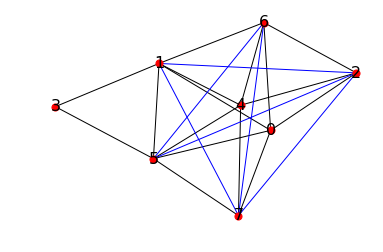

Size of this triangulation: 6


In [85]:
from TriangulationAlgorithms import LEX_M
alex = LEX_M.Algorithm_LexM(G.copy())
alex.run()
# draw the triangulated graph. The original edges are black, new edges are blue.
alex.draw_triangulation()
print ("Size of this triangulation: "+str(len(alex.edges_of_triangulation)))

#### Construct a triangulation using a randomized LEX-M:

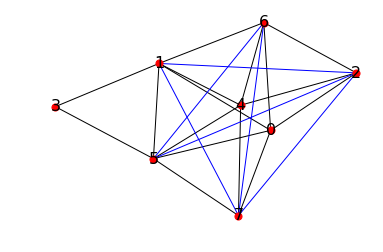

Size of this triangulation: 6


In [86]:
alex = LEX_M.Algorithm_LexM(G.copy())
alex.run_randomized()
# draw the triangulated graph. The original edges are black, new edges are blue.
alex.draw_triangulation()
print ("Size of this triangulation: "+str(len(alex.edges_of_triangulation)))

#### Construct a minimum triangulation by full search:

[(0, 3), (0, 4), (1, 2), (1, 7), (2, 3), (2, 5), (2, 7), (3, 4), (3, 6), (3, 7), (5, 6), (6, 7)]


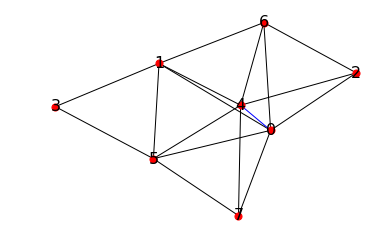

Size of this triangulation: 1


In [87]:
from TriangulationAlgorithms import MT
amt = MT.Algorithm_MinimumTriangulation(G.copy())
amt.run()
# draw the triangulated graph. The original edges are black, new edges are blue.
amt.draw_triangulation()
print ("Size of this triangulation: "+str(len(amt.edges_of_triangulation)))